# Basic Digital Figures

This notebook generates the figures for the lectures notes on Basic Digital Logic.

In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt

import xilinxutils
import xilinxutils.timing
importlib.reload(xilinxutils.timing)
from xilinxutils.timing import SigTimingInfo, ClkSig, TimingDiagram

# Invalid Regions

We illustrate a time-varying signal with undefined regions

['x', '1', 'x', '0', 'x', '1', 'x', '0', 'x', '1', 'x', '0', 'x'] [np.float64(0.0), np.float64(0.6613226452905812), np.float64(4.38877755511022), np.float64(5.7114228456913825), np.float64(9.37875751503006), np.float64(10.701402805611222), np.float64(14.3687374749499), np.float64(15.691382765531062), np.float64(19.35871743486974), np.float64(20.6813627254509), np.float64(24.34869739478958), np.float64(25.67134268537074), np.float64(29.39879759519038)]
[<Axes: > <Axes: >]


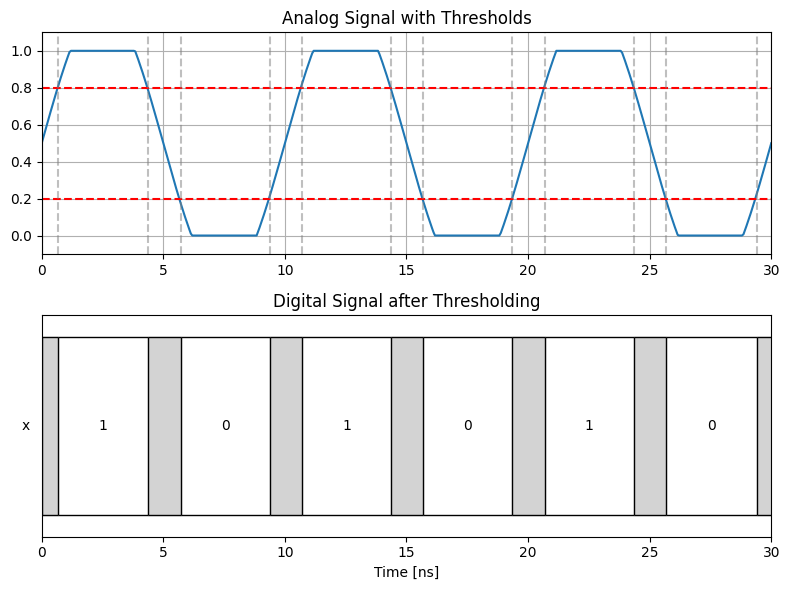

In [46]:
import numpy as np

period = 10
nperiod = 3
nt = 500
t = np.linspace(0, period * nperiod, nt)

scale = 1.5
x =  scale * np.sin(2 * np.pi * t / period)
x = np.maximum(np.minimum(x, 1), -1)
x = 0.5*x + 0.5

# Convert to strings for plotting
xvals = []
xtimes = []
vmin = 0.2
vmax = 0.8
vlast = None
for i in range(nt-1):
    if x[i] < vmin:
        v = '0'
    elif x[i] > vmax:
        v = '1'
    else:
        v = 'x'
    if v != vlast:
        vlast = v
        xvals.append(v)
        xtimes.append(t[i])
print(xvals, xtimes)     

# Top plot: sawtooth wave
trange = [np.min(t), np.max(t)]
fig, ax = plt.subplots(2,1, figsize=(8,6))

print(ax)
ax[0].plot(t, x)
ax[0].axhline(vmin, color='red', linestyle='--')
ax[0].axhline(vmax, color='red', linestyle='--')
for tc in xtimes:
    ax[0].axvline(tc, color='gray', linestyle='--', alpha=0.5)
ax[0].set_ylim([-0.1, 1.1])
ax[0].grid()
ax[0].set_xlim(trange)
ax[0].set_title("Analog Signal with Thresholds")

# Create sawtooth wave

xsig = SigTimingInfo("x", xtimes, xvals)
td = TimingDiagram()
td.add_signal(xsig)
ax1 = td.plot_signals(trange=trange, add_clk_grid=False, ax=ax[1])
ax[1].set_xlabel("Time [ns]")
ax[1].set_title("Digital Signal after Thresholding")
fig.tight_layout()


## Value Change Points

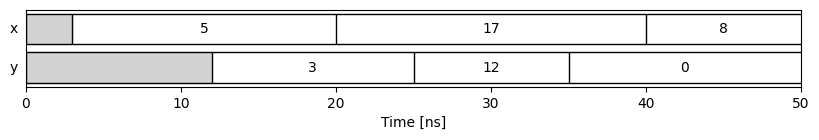

In [ ]:
xvals = ['x', '5', '17', '8']
yvals = ['x', '3', '12', '0']
xtimes = [0, 3, 20, 40]
ytimes = [0, 12, 25, 35]

xsig = SigTimingInfo("x", xtimes, xvals)
ysig = SigTimingInfo("y", ytimes, yvals)
td = TimingDiagram()
td.add_signals([xsig, ysig])
ax = td.plot_signals(trange=[0,50])
_ = ax.set_xlabel("Time [ns]")

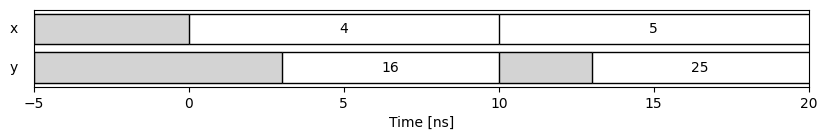

In [70]:
# Timing diagram with y = x^2 
xvals = ['x', '4', '5']
yvals = ['x', '16', 'x', '25']
xtimes = [-10, 0, 10]
ytimes = [-10, 3, 10, 13]

xsig = SigTimingInfo("x", xtimes, xvals)
ysig = SigTimingInfo("y", ytimes, yvals)
td = TimingDiagram()
td.add_signals([xsig, ysig])
ax = td.plot_signals(trange=[-5,20], add_clk_grid=False)
_ = ax.set_xlabel("Time [ns]")

## Combinational ReLU

Timing diagram for relu with linear input:
~~~
    mult_out = x * a;
    add_out = mult_out + b;
    y = (add_out > 0) ? add_out : 0;
~~~

First the diagram for the input `x` only.

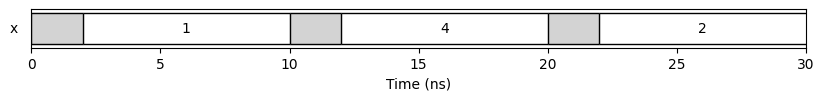

In [17]:
t = np.array([0, 10, 20])
nt = len(t)
xvals = np.array([1, 4, 2])

invalid_time = 2

# Convert to strings for plotting
xstr = []
input_times = []
for i in range(nt):
    xstr += ['x', str(xvals[i])]
    input_times+= [t[i], t[i]+invalid_time]
   
xsig = SigTimingInfo("x", input_times, xstr)

td = TimingDiagram(time_unit='ns')
td.add_signal(xsig)
trange = [0, 30]
ax = td.plot_signals(trange=trange,add_clk_grid=False)
_ = ax.set_xlabel("Time (ns)")

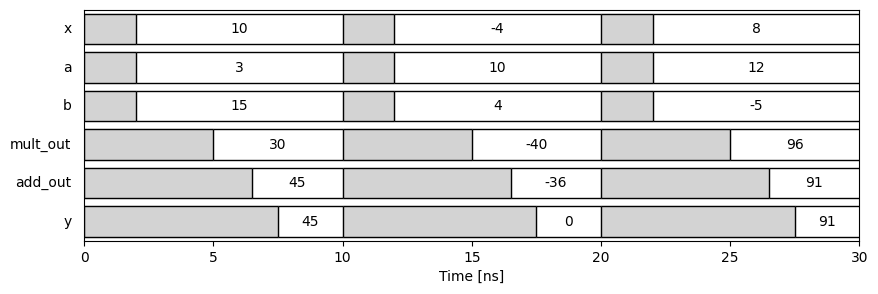

In [49]:
t = np.array([0, 10, 20])
nt = len(t)
xvals = np.array([10, -4, 8])
avals = np.array([3, 10, 12])
bvals = np.array([15, 4, -5])
trange = [0, 30]


# Optional plot only one cycle
one_cycle = False
if one_cycle:
    nt = 1
    xvals = xvals[:nt]
    avals = avals[:nt]
    bvals = bvals[:nt]
    t = t[:nt]
    trange = [0, 15]
# Compute intermediate and output values
mult_vals = xvals * avals
add_vals = mult_vals + bvals
yvals = np.maximum(add_vals, 0)

# Convert to strings for plotting
xstr = []
astr = []
bstr = []
mstr = []
add_str = []
ystr = []
invalid_time = 2
mult_time = 3
add_time = 1.5
max_time = 1
input_times = []
mult_times = []
add_times = []
y_times = []
for i in range(nt):
    xstr += ['x', str(xvals[i])]
    astr += ['x', str(avals[i])]
    bstr += ['x', str(bvals[i])]
    mstr += ['x', str(mult_vals[i])]
    add_str += ['x', str(add_vals[i])]
    ystr += ['x', str(yvals[i])]
    input_times+= [t[i], t[i]+invalid_time]
    mult_times += [t[i], t[i]+invalid_time+mult_time]
    add_times   += [t[i], t[i]+invalid_time+mult_time+add_time]
    y_times  += [t[i], t[i]+invalid_time+mult_time+add_time+max_time]
    
xsig = SigTimingInfo("x", input_times, xstr)
asig = SigTimingInfo("a", input_times, astr)
bsig = SigTimingInfo("b", input_times, bstr)
msig = SigTimingInfo("mult_out", mult_times, mstr)
adsig = SigTimingInfo("add_out", add_times, add_str)
ysig = SigTimingInfo("y", y_times, ystr)
td = TimingDiagram(time_unit='ns')
td.add_signal(xsig)
td.add_signal(asig)
td.add_signal(bsig)
td.add_signal(msig)
td.add_signal(adsig)
td.add_signal(ysig)
ax = td.plot_signals(trange=trange,add_clk_grid=False)
_ = ax.set_xlabel("Time [ns]")


## Register 

we draw the timing diagram for a basic register

Text(0.5, 0, 'Time [ns]')

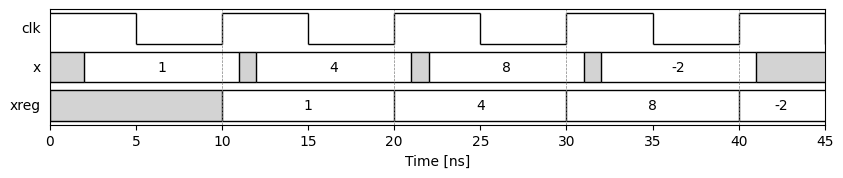

In [57]:
ncycles = 5
clk_period = 10
clk = ClkSig(clk_name="clk", period=clk_period, ncycles=ncycles)
p = clk.clk_periods()

x = np.array([1, 4, 8, -2])
nx = len(x)
xvals = ['x']
xtimes = [0]
thold = 0.1  # fraction of clk period after transition
tsetup = 0.8  # fraction of clk period before transition
xregvals = ['x']
xregtimes = [0]
for i in range(nx):
    xvals += [str(x[i]), 'x']
    xtimes += [(i+1-tsetup)*clk_period, (i+1 + thold)*clk_period]
    xregvals.append(str(x[i]))
    xregtimes.append((i+1)*clk_period)
xsig = SigTimingInfo("x", xtimes, xvals)
xregsig = SigTimingInfo("xreg", xregtimes, xregvals)
td = TimingDiagram()
td.add_signal(clk)
td.add_signal(xsig)
td.add_signal(xregsig)
ax = td.plot_signals()
ax.set_xlabel("Time [ns]")



Next we draw the synchronous timing diagram

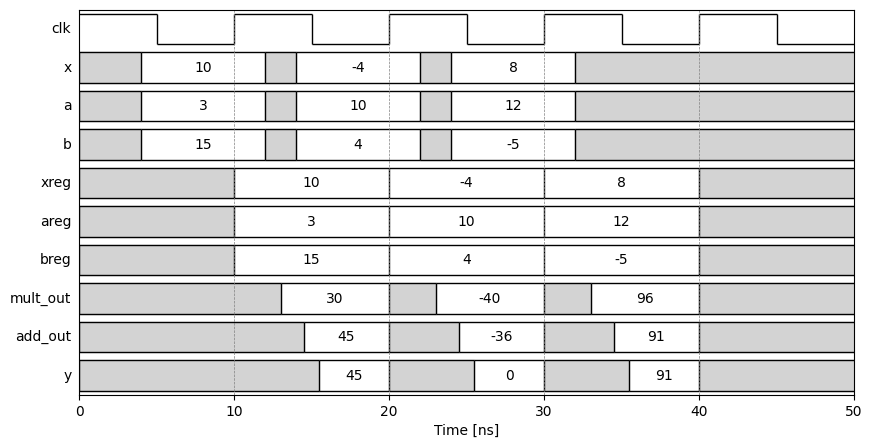

In [66]:


xvals = np.array([10, -4, 8])
avals = np.array([3, 10, 12])
bvals = np.array([15, 4, -5])


# Create a clock signal
ncycles = 5
clk_period = 10
clk = ClkSig(clk_name="clk", period=clk_period, ncycles=ncycles)
p = clk.clk_periods()


# Compute intermediate and output values
mult_vals = xvals * avals
add_vals = mult_vals + bvals
yvals = np.maximum(add_vals, 0)

# Convert to strings for plotting
xstr = ['x']
astr = ['x']
bstr = ['x']
input_times = [0]
xregstr = ['x']
aregstr = ['x']
bregstr = ['x']
mstr = ['x']
add_str = ['x']
ystr = ['x']
intime_pre = 6
intime_post = 2
invalid_time = 2
mult_time = 3
add_time = 1.5
max_time = 1

reg_times = [0]
mult_times = [0]
add_times = [0]
y_times = [0]


for i in range(nt):
    xstr += [str(xvals[i]), 'x']
    astr += [str(avals[i]), 'x']
    bstr += [str(bvals[i]), 'x']
    xregstr += [str(xvals[i])]
    aregstr += [str(avals[i])]
    bregstr += [str(bvals[i])]
    reg_times.append(p[i+1])
    mstr += [str(mult_vals[i]),'x']
    add_str += [str(add_vals[i]), 'x']
    ystr += [str(yvals[i]), 'x']
    input_times+= [p[i+1]-intime_pre, p[i+1]+intime_post]
    mult_times += [p[i+1]+mult_time, p[i+2]]
    add_times   += [p[i+1]+mult_time+add_time, p[i+2]]
    y_times  += [p[i+1]+mult_time+add_time+max_time, p[i+2]]

xregstr += ['x']
aregstr += ['x']
bregstr += ['x']
reg_times.append(p[nt+1])

xsig = SigTimingInfo("x", input_times, xstr)
asig = SigTimingInfo("a", input_times, astr) 
bsig = SigTimingInfo("b", input_times, bstr)
xregsig = SigTimingInfo("xreg", reg_times, xregstr)
aregsig = SigTimingInfo("areg", reg_times, aregstr)
bregsig = SigTimingInfo("breg", reg_times, bregstr)
multsig = SigTimingInfo("mult_out", mult_times, mstr)
adsig = SigTimingInfo("add_out", add_times, add_str)
ysig = SigTimingInfo("y", y_times, ystr)
td = TimingDiagram()
td.add_signals([clk])
td.add_signals([xsig, asig, bsig])
td.add_signals([xregsig, aregsig, bregsig])
td.add_signals([multsig, adsig, ysig])
trange = [0, 50]
ax = td.plot_signals(trange=trange,add_clk_grid=True)
_ = ax.set_xlabel("Time [ns]")


[0, np.float64(14.5), np.float64(20.0), np.float64(24.5), np.float64(30.0), np.float64(34.5), np.float64(40.0)]


# Timing for Quadratic funciton with three stage pipeline

~~~python
    xsq = x*x
    lin_term = w1*x + w0
    y = w2*xsq + lin_term
~~~



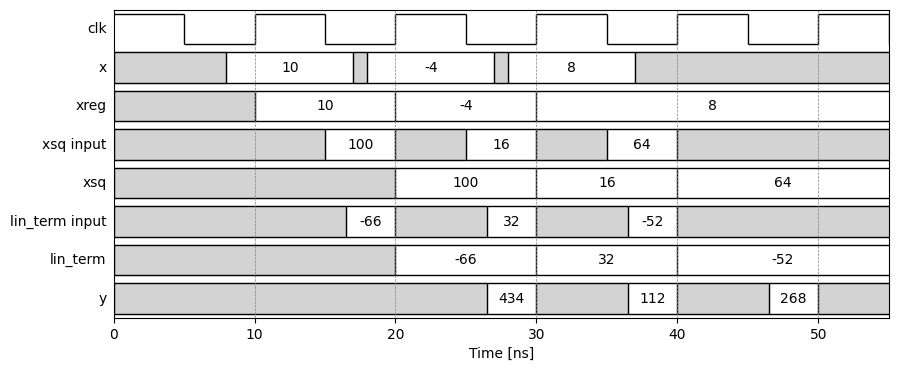

In [89]:
w = [4, -7, 5]

xvals = np.array([10, -4, 8])
nin = len(xvals)
xsqvals = xvals**2
linear_vals = w[1]*xvals + w[0]
yvals = linear_vals + w[2]*xsqvals

# Times
clk_period = 10
xsq_dly = 5
ydly = 6.5
lindly = 6.5

# Create a clock signal
ncycles = 6
clk = ClkSig(clk_name="clk", period=clk_period, ncycles=ncycles)
p = clk.clk_periods()

# Convert to strings for plotting
xstr = ['x']
xreg = ['x']
xsqstr = ['x']
xsqinstr = ['x']
lininstr = ['x']
linstr = ['x']
ystr = ['x']
input_times = [0]
xreg_times = [0]
xsq_times = [0]
xsqin_times = [0]
linin_times = [0]
lin_times = [0]
y_times = [0]
for i in range(nin):
    xstr += [str(xvals[i]), 'x']
    xreg += [str(xvals[i])]
    xreg_times += [p[i+1]]
    xsqinstr += [str(xsqvals[i]), 'x']
    input_times+= [p[i+1]-2, p[i+1]+7]
    xsqin_times += [p[i+1]+xsq_dly, p[i+2]]
    xsqstr.append(xsqvals[i])
    xsq_times += [p[i+2]]
    linin_times += [p[i+1]+lindly, p[i+2]]
    lininstr += [str(linear_vals[i]), 'x']
    lin_times += [p[i+2]]
    linstr += [str(linear_vals[i])]
    y_times  += [p[i+2]+ydly, p[i+3]]
    ystr += [str(yvals[i]), 'x']

td = TimingDiagram()
td.add_signal(clk)
xsig = SigTimingInfo("x", input_times, xstr)
xregsig = SigTimingInfo("xreg", xreg_times, xreg)
xsqinsig = SigTimingInfo("xsq input", xsqin_times, xsqinstr)
xsqsig = SigTimingInfo("xsq", xsq_times, xsqstr)
lininsig = SigTimingInfo("lin_term input", linin_times, lininstr)
linsig = SigTimingInfo("lin_term", lin_times, linstr)
ysig = SigTimingInfo("y", y_times, ystr)

td.add_signal(xsig)
td.add_signal(xregsig)
td.add_signals([xsqinsig, xsqsig, lininsig, linsig, ysig])
ax = td.plot_signals()
_ = ax.set_xlabel("Time [ns]")



In [87]:
yvals

array([-426, -104, -260])